In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

path = "/content/drive/My Drive/PROJECT 1001/most_final_dataset.csv"
data = pd.read_csv(path)
data.head()

,Unnamed: 0,MONTH,DAY_OF_WEEK,DEP_DELAY,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,ARR_DELAY,ARR_DEL15,AIR_TIME,DISTANCE,CARRIER_DELAY,NAS_DELAY,SECURITY_DELAY,PRCP,WDSP,VISIB,DELAY_TO_NO_DELAY_RATIO,DELAY_PROB,DelayScore,DELAY_TO_NO_DELAY_RATIO_DEST,DELAY_PROB_DEST,DelayScore_DEST
0,0,1,7,-1.0,0.0,-1.0,16.0,2238.0,-10.0,0.0,66.0,481.0,NaN,NaN,NaN,0.00,3.4,10.0,0.189241,0.159128,3,0.131206,0.115987,2
1,1,1,2,-3.0,0.0,-1.0,15.0,637.0,-6.0,0.0,59.0,404.0,NaN,NaN,NaN,0.83,11.2,9.0,0.189241,0.159128,3,0.224719,0.183486,4
2,2,1,1,2.0,0.0,0.0,9.0,1917.0,1.0,0.0,187.0,1184.0,NaN,NaN,NaN,0.00,4.8,10.0,0.189241,0.159128,3,0.210526,0.173913,4
3,3,1,6,2.0,0.0,0.0,9.0,1731.0,-1.0,0.0,62.0,406.0,NaN,NaN,NaN,0.00,7.6,10.0,0.189241,0.159128,3,0.184265,0.155594,3
4,4,1,5,-4.0,0.0,-1.0,13.0,1059.0,-20.0,0.0,117.0,821.0,NaN,NaN,NaN,0.00,6.7,10.0,0.189241,0.159128,3,0.148760,0.129496,3


In [0]:
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(['DEP_DELAY_GROUP', 'DISTANCE', 'DELAY_TO_NO_DELAY_RATIO', 'DELAY_PROB', 'DELAY_TO_NO_DELAY_RATIO_DEST', 'DELAY_PROB_DEST', 'WHEELS_OFF'], axis=1)
data.head()

,MONTH,DAY_OF_WEEK,DEP_DELAY,DEP_DEL15,TAXI_OUT,ARR_DELAY,ARR_DEL15,AIR_TIME,CARRIER_DELAY,NAS_DELAY,SECURITY_DELAY,PRCP,WDSP,VISIB,DelayScore,DelayScore_DEST
0,1,7,-1.0,0.0,16.0,-10.0,0.0,66.0,NaN,NaN,NaN,0.00,3.4,10.0,3,2
1,1,2,-3.0,0.0,15.0,-6.0,0.0,59.0,NaN,NaN,NaN,0.83,11.2,9.0,3,4
2,1,1,2.0,0.0,9.0,1.0,0.0,187.0,NaN,NaN,NaN,0.00,4.8,10.0,3,4
3,1,6,2.0,0.0,9.0,-1.0,0.0,62.0,NaN,NaN,NaN,0.00,7.6,10.0,3,3
4,1,5,-4.0,0.0,13.0,-20.0,0.0,117.0,NaN,NaN,NaN,0.00,6.7,10.0,3,3


In [0]:
data = data[data['ARR_DEL15']==1]
data.head()

,MONTH,DAY_OF_WEEK,DEP_DELAY,DEP_DEL15,TAXI_OUT,ARR_DELAY,ARR_DEL15,AIR_TIME,CARRIER_DELAY,NAS_DELAY,SECURITY_DELAY,PRCP,WDSP,VISIB,DelayScore,DelayScore_DEST
700,1,3,142.0,1.0,47.0,167.0,1.0,53.0,0.0,25.0,0.0,0.15,14.8,7.1,3,2
701,1,3,262.0,1.0,17.0,253.0,1.0,122.0,3.0,0.0,0.0,0.15,14.8,7.1,3,2
702,1,4,33.0,1.0,16.0,15.0,1.0,79.0,15.0,0.0,0.0,0.14,11.7,10.0,3,3
703,1,1,52.0,1.0,25.0,49.0,1.0,109.0,49.0,0.0,0.0,0.00,5.5,8.4,3,4
704,1,4,132.0,1.0,14.0,131.0,1.0,60.0,0.0,0.0,0.0,0.05,9.2,3.0,3,5


In [0]:
data - data.drop(columns='ARR_DEL15')
data.head()

,MONTH,DAY_OF_WEEK,DEP_DELAY,DEP_DEL15,TAXI_OUT,ARR_DELAY,ARR_DEL15,AIR_TIME,CARRIER_DELAY,NAS_DELAY,SECURITY_DELAY,PRCP,WDSP,VISIB,DelayScore,DelayScore_DEST
700,1,3,142.0,1.0,47.0,167.0,1.0,53.0,0.0,25.0,0.0,0.15,14.8,7.1,3,2
701,1,3,262.0,1.0,17.0,253.0,1.0,122.0,3.0,0.0,0.0,0.15,14.8,7.1,3,2
702,1,4,33.0,1.0,16.0,15.0,1.0,79.0,15.0,0.0,0.0,0.14,11.7,10.0,3,3
703,1,1,52.0,1.0,25.0,49.0,1.0,109.0,49.0,0.0,0.0,0.00,5.5,8.4,3,4
704,1,4,132.0,1.0,14.0,131.0,1.0,60.0,0.0,0.0,0.0,0.05,9.2,3.0,3,5


In [0]:
#data.isnull().any()
data = data.dropna(axis=0)
data = data.sample(frac=1).reset_index(drop=True)

In [0]:
len(data)

165251

In [0]:
X = data.drop('ARR_DELAY', axis=1)
y = data['ARR_DELAY']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(len(X_train))
print(len(X_test))

123938
41313


##MLP Regression

In [0]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(
    hidden_layer_sizes=(16,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [0]:
nn.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16,), learning_rate='constant',
             learning_rate_init=0.01, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=9, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
# Mean Absolute Error and R2 score on training data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

y_pred = nn.predict(X_train)
print(mean_absolute_error(y_pred, y_train))
r2_score(y_pred, y_train)

4.318737011697855


0.9905887592171935

In [0]:
# Mean Absolute Error and R2 score on test data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

y_pred = nn.predict(X_test)
print(mean_absolute_error(y_pred, y_test))
r2_score(y_pred, y_test)

4.308073443924177


0.9909306436822441

Visualisations for checking prediction accuracy

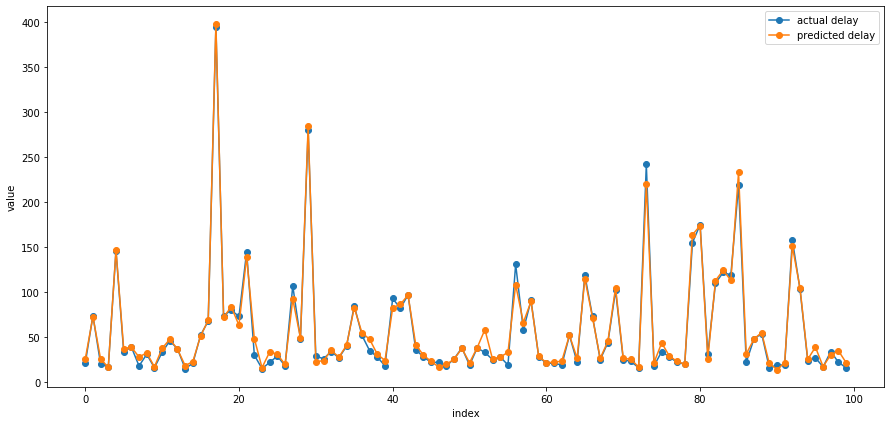

In [0]:
import matplotlib.pyplot as plt

y_test = np.array(y_test)

x = np.arange(len(y_test[:100]))

plt.figure(figsize=(15, 7))
plt.plot(x, y_test[:100], '-o', label='actual delay')
plt.plot(x, y_pred[:100], '-o', label='predicted delay')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

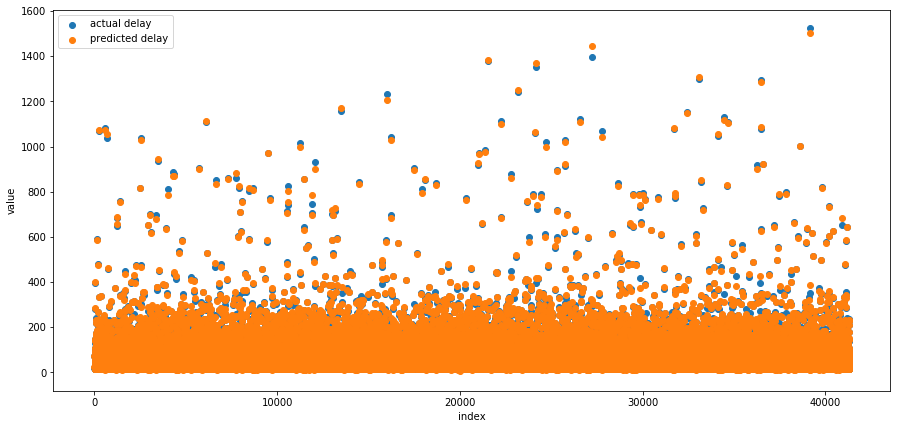

In [0]:
import matplotlib.pyplot as plt

y_test = np.array(y_test)

x = np.arange(len(y_test))

plt.figure(figsize=(15, 7))
plt.scatter(x, y_test, label='actual delay')
plt.scatter(x, y_pred, label='predicted delay')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()